<a href="https://colab.research.google.com/github/A7Che/programs/blob/main/%D0%9A%D1%80%D0%B0%D1%81%D0%BD%D1%8B%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 506319_15.jpeg to 506319_15.jpeg


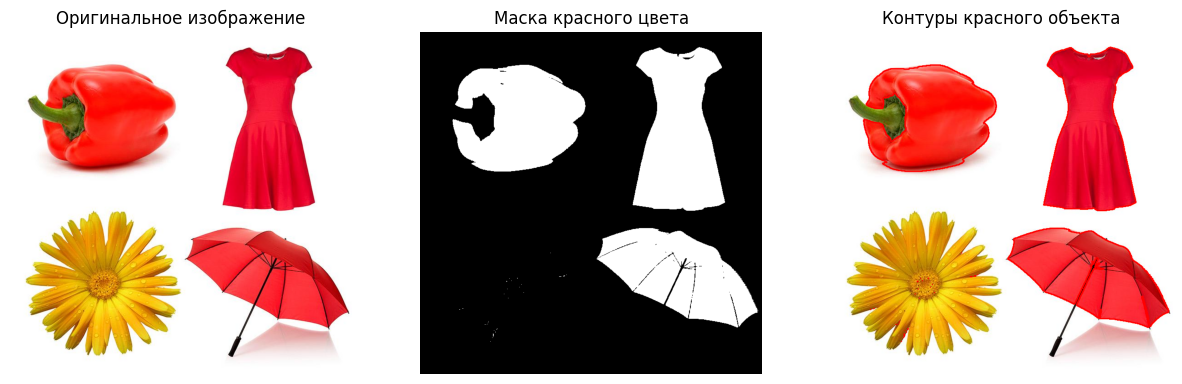

In [1]:
# Установка необходимых библиотек
!pip install opencv-python-headless

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
from google.colab import files
uploaded = files.upload()

# Предполагаем, что загружено одно изображение
image_path = next(iter(uploaded))
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Преобразуем BGR в RGB

# Преобразование в цветовое пространство HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Определение диапазона красного цвета
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Создание маски
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = mask1 | mask2

# Нахождение контуров
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Рисование контуров на изображении
output_image = image.copy()
cv2.drawContours(output_image, contours, -1, (255, 0, 0), 2)  # Красный цвет (BGR)

# Отображение оригинального, маски и обработанного изображений
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Оригинальное изображение')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Маска красного цвета')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Контуры красного объекта')
plt.imshow(output_image)
plt.axis('off')

plt.show()